In [2]:
from data_loader import torch_dataset_loader
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from config import PARAS
from mel_dealer import mel_converter
import torch
import librosa
import torch

In [3]:
test_loader = torch_dataset_loader(PARAS.DATASET_PATH + 'test_enhanced.h5', PARAS.BATCH_SIZE, False, PARAS.kwargs)

In [4]:
len(test_loader)

157

In [41]:
for index, data_item in enumerate(test_loader):
    if index == 128 :
        break

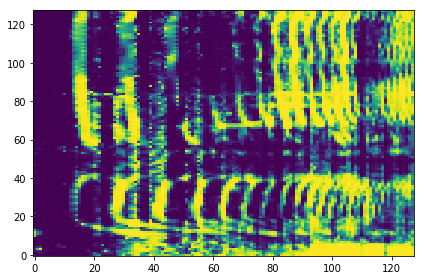

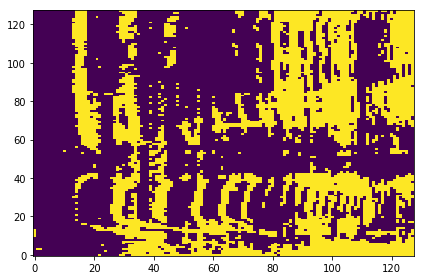

In [42]:
plt.figure()
plt.imshow(data_item['scale_mask'][1], aspect='auto', origin='lower')
plt.tight_layout()
plt.show()
plt.figure()
plt.imshow(data_item['binary_mask'][1], aspect='auto', origin='lower')
plt.tight_layout()
plt.show()

In [55]:
from cluster_model import D_model
from hybrid_model import H_model
from unet_model import U_model

U_model.load_state_dict(torch.load(PARAS.MODEL_SAVE_PATH + 'unet_model_1.pt', map_location='cpu'))
U_model.eval()
D_model.load_state_dict(torch.load(PARAS.MODEL_SAVE_PATH + 'dc_model_may_new_set_May11_after100.pt', map_location='cpu'))
D_model.eval()
H_model.load_state_dict(torch.load(PARAS.MODEL_SAVE_PATH + 'hd_model_newset_may_11_after100.pt', map_location='cpu'))
H_model.eval()

HModel(
  (gru): GRU(128, 500, num_layers=4, batch_first=True, dropout=0.5, bidirectional=True)
  (embedding): Linear(in_features=1000, out_features=2560, bias=True)
  (activation): Tanh()
  (fcBlock): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=2560, out_features=256, bias=True)
  )
  (outMask): Sequential(
    (0): Softmax()
  )
)

In [56]:
def get_cluster(model, inp):
    shape = inp.shape
    with torch.no_grad():
        model.eval()
        inp = inp.view((1, shape[0], -1))
        predicted = model(inp)
    return predicted

def get_cluster2(model, inp):
    shape = inp.shape
    with torch.no_grad():
        model.eval()
        inp = inp.unsqueeze(0).unsqueeze(1)
        predicted = model(inp)
    return predicted.squeeze(0)

In [57]:
dc_ans = get_cluster(D_model, data_item['mix'][1])
unet_ans = get_cluster2(U_model, data_item['mix'][1])
hd_ansa, hd_ansb = get_cluster(H_model, data_item['mix'][1])

In [58]:
unet_ans.shape

torch.Size([128, 128])

In [59]:
from utils import embedding_to_mask
dc_ans1, dc_ans2 = embedding_to_mask(dc_ans)
hd_ansa1, hd_ansa2 = embedding_to_mask(hd_ansa)
hd_mask, _ = torch.unbind(hd_ansb.squeeze(0), dim=2)
hd_mask =hd_mask.numpy()

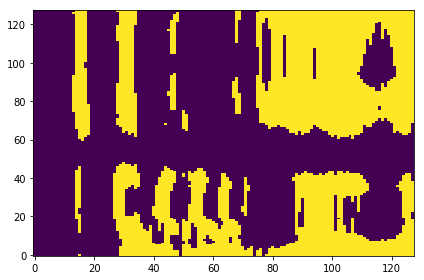

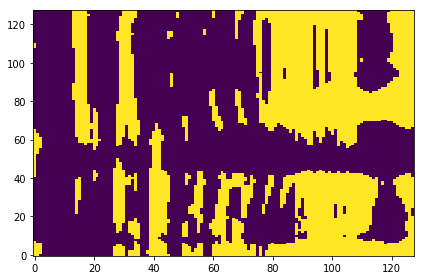

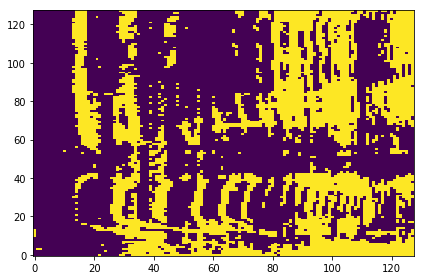

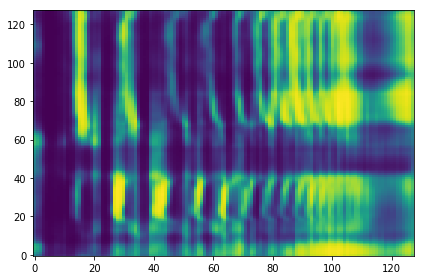

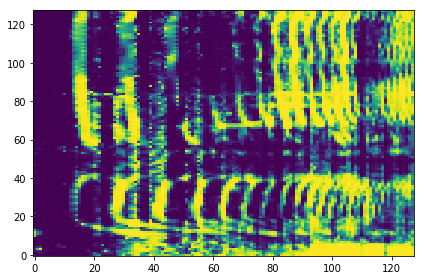

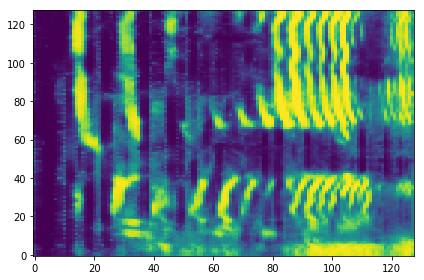

In [60]:
plt.figure()
plt.imshow(dc_ans2, aspect='auto', origin='lower')
plt.tight_layout()
plt.show()
plt.figure()
plt.imshow(hd_ansa2, aspect='auto', origin='lower')
plt.tight_layout()
plt.show()
plt.figure()
plt.imshow(data_item['binary_mask'][1], aspect='auto', origin='lower')
plt.tight_layout()
plt.show()

plt.figure()
plt.imshow(hd_mask, aspect='auto', origin='lower')
plt.tight_layout()
plt.show()
plt.figure()
plt.imshow(data_item['scale_mask'][1], aspect='auto', origin='lower')
plt.tight_layout()
plt.show()

plt.figure()
plt.imshow(unet_ans.numpy(), aspect='auto', origin='lower')
plt.tight_layout()
plt.show()


In [61]:
mix_amplitude = librosa.db_to_power(data_item['mix'][1].numpy())

In [62]:
ans = mix_amplitude * hd_ansa1

In [63]:
mel_converter.melspec_to_audio(ans, log=False)